# Single Digit Addition

## Imports

In [11]:
import numpy as np
import sys
sys.path.append("../../")
import time
import torch
from dataGen import dataList, obsList, test_loader
from dlpmln import DeepLPMLN
from network import Net


from IPython.display import display
from PIL import Image

## Define dprogram

In [12]:
dprogram = '''
img(i1). img(i2).

addition(A,B,N) :- digit(A,0,N1), digit(B,0,N2), N=N1+N2.

nn(m(X,1), digit, [0,1,2,3,4,5,6,7,8,9]) :- img(X).
'''

### train_dataset
Pytorch Dataset object consisting of 30000 data instances of the form:

                        [dataTensor1, dataTensor2, labelTensor]

where dataTensor1 and dataTensor2 are tensors of size (1,28,28) for 2 digit images and
label is an integer tensor for the label.train_dataset is used to generate dataList, where each dataTensor in train_dataset is
reshaped to (1,1,28,28) by dataTensor.unsqueeze(0) .



### test_loader

Pytorch DataLoader object consisting of 10 batches in the following format

[  
[dataTensors, labelTensors]  
...  

[dataTensors, labelTensors]  
]

Here dataTensors is of the form   [data, ..., data], and consists of 1000 data.  
labelTensors is of the form [label, ..., label], and consists of 1000 labels,
where data is a tensor of size (1,28,28) for a digit image and label is an integer tensor  
for its label.

## Create Neural Network

In [13]:
m = Net()
nnMapping = {'m':m}
optimizers = {'m':torch.optim.Adam(m.parameters(), lr=0.001)}

## Create DeepLPMLN object

In [14]:
dlpmlnObj = DeepLPMLN(dprogram, nnMapping, optimizers)

## Train and Test

In [15]:

startTime = time.time()
for i in range(1):
    print('Epoch {}...'.format(i+1))
    time1 = time.time()
    dlpmlnObj.learn(dataList=dataList, obsList=obsList, epoch=1)
    time2 = time.time()
    dlpmlnObj.testNN("m", test_loader)
    print("--- train time: %s seconds ---" % (time2 - time1))
    print("--- test time: %s seconds ---" % (time.time() - time2))
    print('--- total time from beginning: %s minutes ---' % int((time.time() - startTime)/60) )


Epoch 1...
Training for epoch 1 ...
Test Accuracy on NN Only for m: 98%
--- train time: 333.499653339386 seconds ---
--- test time: 0.9439902305603027 seconds ---
--- total time from beginning: 5 minutes ---


## DeepLPMLN vs DeepProbLog vs CNN

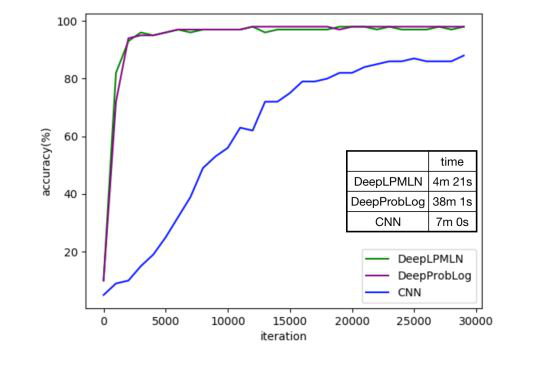

In [16]:
path="training_comparison.jpg"
display(Image.open(path))

The following image shows the accuracy on the test data after each iteration of training data.
The method CNN denotes the baseline introduced in (Manhaeve et al. 2018) where a
convolutional neural network (with more parameters) is trained to classify the concatenation of
the two images into the 19 possible sums. 

As we can see, the neural networks trained by DeepLPMLN and DeepProbLog converge much
faster than CNN and have almost the same accuracy at each iteration. However, DeepLPMLN
spends much less time for training compared to DeepProbLog. The time reported is for one
epoch (30,000 iterations in gradient descent). This is because DeepProbLog constructs an
SDD (Sequential Decision Diagram) at each iteration for each training instance (i.e., each pair of
images) while SDD construction is time consuming.